<a href="https://colab.research.google.com/github/irvandandung/iris-project/blob/master/Iris_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Download file iris file

In [23]:
!wget -O /content/sample_data/iris.csv https://raw.githubusercontent.com/irvandandung/iris-project/master/iris.csv

--2021-08-13 12:23:06--  https://raw.githubusercontent.com/irvandandung/iris-project/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘/content/sample_data/iris.csv’

/content/sample_dat 100%[===================>]   4.99K  --.-KB/s    in 0s      

2021-08-13 12:23:06 (59.6 MB/s) - ‘/content/sample_data/iris.csv’ saved [5107/5107]



- Import Package

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import plotly.express as px
%matplotlib inline

- read file csv

In [25]:
dataset = pd.read_csv('/content/sample_data/iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- Remove data in column id

In [26]:
dataset.drop(['Id'], axis=1, inplace=True)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


- Describe dataset

In [27]:
dataset.describe([.20, .40, .60, .80], 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
20%,5.000000,2.700000,1.500000,0.200000,NaN
40%,5.600000,3.000000,3.900000,1.160000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN


- how many data of each species in this data set

In [28]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

- visualization of the data above

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c343d1890>]],
      dtype=object)

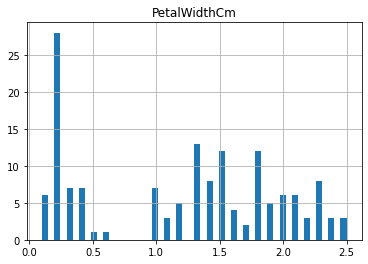

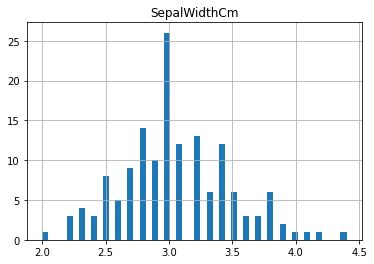

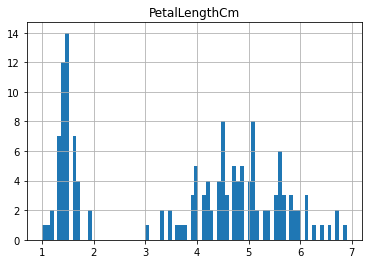

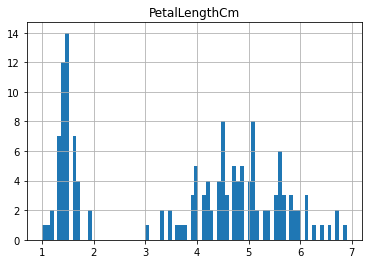

In [29]:
dataset.hist(column='PetalWidthCm', bins=50) 
dataset.hist(column='SepalWidthCm', bins=50)
dataset.hist(column='PetalLengthCm', bins=80)
dataset.hist(column='PetalLengthCm', bins=80)

- Feature set

In [30]:
X = dataset.iloc[:, :-1].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [31]:
y = dataset.iloc[:, 4].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

- Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


- Classification with KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [37]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9666666666666667


In [38]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93333333, 0.93333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667])

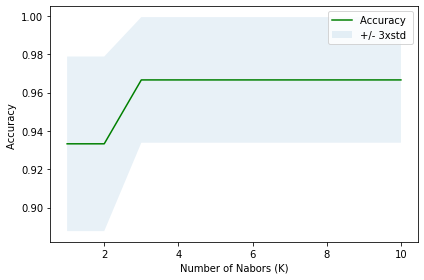

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [40]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9666666666666667 with k= 3


In [41]:
y_score = neigh.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

Predict Test

In [42]:
!wget -O /content/sample_data/sample_data.csv https://raw.githubusercontent.com/irvandandung/iris-project/master/sample_data.csv

--2021-08-13 12:23:57--  https://raw.githubusercontent.com/irvandandung/iris-project/master/sample_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161 [text/plain]
Saving to: ‘/content/sample_data/sample_data.csv’

/content/sample_dat 100%[===================>]     161  --.-KB/s    in 0s      

2021-08-13 12:23:57 (7.42 MB/s) - ‘/content/sample_data/sample_data.csv’ saved [161/161]



In [43]:
datauji = pd.read_csv('/content/sample_data/sample_data.csv')
datauji.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,150,5.9,3.0,5.1,1.8,Iris-virginica
2,51,7.0,3.2,4.7,1.4,Iris-versicolor


In [44]:
x_new = datauji.iloc[:, 1:-1].values
x_new

array([[5.1, 3.5, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [7. , 3.2, 4.7, 1.4]])

In [45]:
neigh = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
y_predict = neigh.predict(x_new)
print('prediction for item x_new :', y_predict)
print('x_new index-0 adalah Iris-virginica:', y_predict[0] == 'Iris-setosa')
print('x_new index-1 adalah Iris-setosa:', y_predict[1] == 'Iris-virginica')
print('x_new index-1 adalah Iris-versicolor:', y_predict[2] == 'Iris-versicolor')

prediction for item x_new : ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']
x_new index-0 adalah Iris-virginica: True
x_new index-1 adalah Iris-setosa: True
x_new index-1 adalah Iris-versicolor: True
